In [1]:
from IGQG import *
import numpy as np
import pandas as pd
#from scipy import optimize

#%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import ticker
mp.dps=100

In [2]:
Na = 602214076*power(10,-8)*power(10,23)

eta = power(2,-1)
eta_st ='1/2'
#eta = mp.mpf(2)
#eta_st='2'

In [3]:
#df= pd.read_csv('curvature_max-eta{}.csv'.format(eta))
df = pd.read_csv('curvature_max-eta{}_orderNa.csv'.format(eta))
n,gstar,Rstar=df['N/Na'].to_numpy(),df['gamma*'].to_numpy(),df['R*'].to_numpy()

In [4]:
ns = np.logspace(0,20,81,base=2)
ind = n<=ns[-1]
n,gstar,Rstar=n[ind],gstar[ind],Rstar[ind]
g = np.sort(np.concatenate([gstar,(gstar[1:]+gstar[:-1])/2,np.linspace(-3e-9,0,51),np.linspace(0,.5e-9,10)]))

if eta==2:
    ns = np.logspace(-10,10,81,base=2)
    ind = n<=ns[-1]
    n,gstar,Rstar=n[ind],gstar[ind],Rstar[ind]
    g = np.sort(np.concatenate([gstar,(gstar[1:]+gstar[:-1])/2,np.linspace(2.5e-12,0,51),np.linspace(0,-.5e-12,10)]))

$$\gamma = \frac{\beta-\beta_c}{\beta_c}$$

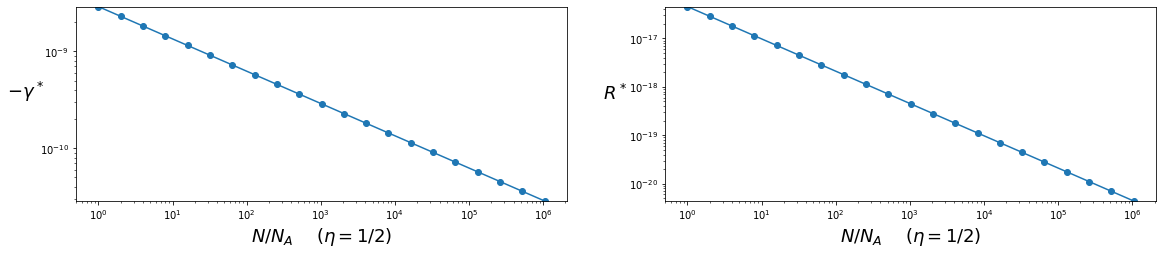

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,3))


y1,gs=gstar,''
if np.sign(gstar[0]) == -1:
    y1,gs=-y1,'-'
ax1.plot(n, y1)
ax1.scatter(n, y1)
ax1.set_xlabel(r'$N/N_A$    $\left(\eta={} \right)$'.format(eta_st),fontsize=18)
ax1.set_ylabel(r'${}\gamma^*$    '.format(gs),fontsize=18,rotation=0)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(y1.min(),y1.max())

ax2.plot(n, Rstar)
ax2.scatter(n, Rstar) 
ax2.set_xlabel(r'$N/N_A$    $\left(\eta={} \right)$'.format(eta_st),fontsize=18)
ax2.set_ylabel(r'$R^*$    ',fontsize=18,rotation=0)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(Rstar.min(),Rstar.max())

plt.subplots_adjust(left=0.1,bottom=0.05, right=1.35, top=.95, wspace=0.2, hspace=0.1)
plt.savefig('Rg_n-eta{}.png'.format(eta), bbox_inches = "tight",dpi=600)
plt.show()

In [6]:
z = [NgammaBEcurvature(eta,N,g) for N in ns*Na]
zp = [zz/zz.max() for zz in z]
G,Ns = np.meshgrid(g,ns)
Z = np.vstack(zp)

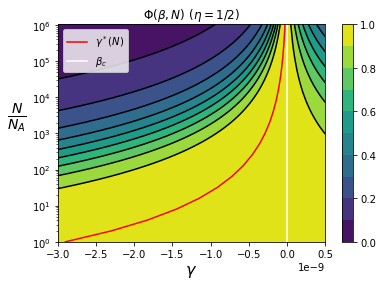

In [7]:
lvls=np.linspace(0,1,11)
fig, ax = plt.subplots()
CS = ax.contour(G,Ns,Z,colors='k',levels=lvls)
CF = ax.contourf(G,Ns,Z,levels=lvls)

plt.plot(gstar,n,color='red',label=r'$\gamma^*(N)$')
plt.plot(np.zeros(2),[n.min(),n.max()],color='white',label=r'$\beta_c$')

ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_xlabel(r'$\gamma$',fontsize=16)
ax.set_ylabel(r'$\frac{N}{N_A}$    ',fontsize=20,rotation=0)
ax.set_title(r'$\Phi(\beta,N)$ $\left(\eta={}\right)$ '.format(eta_st))

plt.colorbar(CF)
plt.legend()
plt.savefig('Rratebosons-eta{}.png'.format(eta), bbox_inches = "tight",dpi=900)

plt.show()